Para estimar la demanda de productos en una cadena de supermercados considerando los factores mencionados (stock, ofertas y ventas históricas), se puede desarrollar un modelo utilizando Python y herramientas de análisis de datos y aprendizaje automático. A continuación, se describe cómo abordar el problema, junto con un modelo conceptual y el uso de las herramientas necesarias:
## 1. Enfoque General
    a. Objetivo
    Estimar la demanda diaria esperada de cada producto en cada tienda, ajustada por:
        •	Disponibilidad de stock.
        •	Impacto de las ofertas.
        •	Tendencias de ventas históricas.
    b. Consideraciones
        •	Usar únicamente datos de días con stock suficiente para calcular el promedio y modelar la demanda base.
        •	Capturar el impacto de las ofertas como un multiplicador en la demanda base.
        •	Incorporar estacionalidad y patrones semanales.
    c. Herramientas
        •	Pandas: Para manipulación y limpieza de datos.
        •	Scikit-learn: Para modelos de regresión lineal y Machine Learning.
        •	Statsmodels: Para modelado de series temporales (opcional).
        •	NumPy y Matplotlib/Seaborn: Para cálculos y visualización.

## 2. Diseño del Modelo
### a. Variables de Entrada
1.	Fecha: Día específico.
2.	Tienda: Identificador de la tienda.
3.	Producto: Identificador del producto.
4.	Ventas Diarias: Cantidad vendida en ese día.
5.	Stock Suficiente (Booleano): Indicador de si había suficiente stock.
6.	En Oferta (Booleano): Indicador de si el producto estaba en oferta.
7.	Precio Relativo: Precio del producto en comparación con su precio regular.
    El precio relativo es un dato numérico continuo y se utiliza en modelos de predicción como una variable independiente. Es importante normalizar o estandarizar esta variable si se emplea en modelos de Machine Learning que son sensibles a la escala.

    Precio Actual / Precio Regular

        **Formato de Dato** 
        Tipo de dato en Python: float
        Valores típicos:
        < 1.0: Indica descuentos.
        1.0: Precio igual al precio regular.
        > 1.0: Precio más alto que el regular.
8.	Características Externas: Festivos, eventos locales, etc.

### b. Preparación de Datos

1.	Filtrar días sin suficiente stock para estimar la demanda base.

2.	Calcular el promedio de ventas diarias por producto-tienda para los días con stock suficiente.

3.	Codificar información sobre ofertas y ajustar la demanda observada.

## 3. Modelo Basado en Regresión
1.	Regresión Lineal Múltiple Usar variables como precio relativo, indicador de oferta, día de la semana, y festividad para estimar la demanda diaria.
Fórmula básica:
 
Demandat=β0+β1(Ofertat)+β2(Precio Relativot)+β3(Dıˊa de la Semanat)+ϵ\text{Demanda}_t = \beta_0 + \beta_1 (\text{Oferta}_t) + \beta_2 (\text{Precio Relativo}_t) + \beta_3 (\text{Día de la Semana}_t) + \epsilonDemandat=β0+β1(Ofertat)+β2(Precio Relativot)+β3(Dıˊa de la Semanat)+ϵ

2.	Algoritmos de ML Adicionales
o	Random Forest: Para modelar relaciones no lineales y manejar interacciones complejas entre variables.
o	XGBoost: Para mejorar la precisión en estimaciones más complejas.
3.	Validación del Modelo Dividir los datos en conjuntos de entrenamiento y prueba. Utilizar métricas como el RMSE o MAE para evaluar la precisión.

4. Implementación en Python
A continuación, un esquema básico del código:


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_csv("ventas_historicas.csv")

# Filtrar días con stock suficiente
data = data[data['stock_suficiente'] == 1]

# Crear variables de tiempo
data['day_of_week'] = pd.to_datetime(data['fecha']).dt.dayofweek
data['is_weekend'] = data['day_of_week'].isin([5, 6]).astype(int)

# Variables dummies para ofertas y estacionalidad
data['oferta'] = data['oferta'].astype(int)
data = pd.get_dummies(data, columns=['day_of_week'], drop_first=True)

# Definir variables independientes y dependientes
X = data[['oferta', 'precio_relativo', 'is_weekend'] + [col for col in data.columns if 'day_of_week_' in col]]
y = data['ventas']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE del modelo: {rmse}")

# Importancia de las variables
importances = model.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.title("Importancia de las Variables en el Modelo")
plt.show()


ModuleNotFoundError: No module named 'sklearn'

## Utilizar POSTGRE para Acelerar Cálculos

In [ ]:
import pandas as pd
from sqlalchemy import create_engine

# Configurar la conexión
db_config = {
    "host": "tu_host",
    "port": "5432",  # Puerto por defecto
    "dbname": "nombre_base_datos",
    "user": "tu_usuario",
    "password": "tu_contraseña"
}

# Crear la conexión usando SQLAlchemy
engine = create_engine(
    f"postgresql://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['dbname']}"
)

# Probar la conexión y cargar datos directamente
query = """
SELECT fecha, tienda, producto, ventas, stock_suficiente, oferta, precio_relativo
FROM ventas_historicas
WHERE stock_suficiente = true;  -- Filtrar días con stock suficiente
"""

# Cargar datos en un DataFrame de pandas
data = pd.read_sql(query, engine)

print(data.head())


### Procesar Datos en la Base de Datos 
Aprovecha la potencia de PostgreSQL para realizar cálculos y filtrados directamente en la base de datos antes de cargar los datos en Python. Por ejemplo:

In [ ]:
# sql 
SELECT tienda, producto, AVG(ventas) AS promedio_ventas
FROM ventas_historicas
WHERE stock_suficiente = true
GROUP BY tienda, producto;

#sql
SELECT tienda, producto, AVG(ventas) AS promedio_ventas
FROM ventas_historicas
WHERE stock_suficiente = true
GROUP BY tienda, producto;



### Carga Parcial de Datos 
Si los datos son demasiado grandes para cargarlos todos a la vez, puedes dividirlos en "chunks" (porciones) utilizando la función chunksize de pandas:

In [ ]:
for chunk in pd.read_sql(query, engine, chunksize=10000):
    # Procesar cada porción por separado
    procesar_chunk(chunk)


## Incorporar Estacionalidad con PROPHET

Prophet es especialmente útil para capturar estacionalidades, tendencias y efectos de días festivos. En tu caso, puedes añadir los días festivos de Argentina como una de las entradas del modelo.

### Preparación de los Datos
Asegúrate de tener los datos en un formato adecuado para Prophet. Necesitas al menos dos columnas:

* ds: Fecha (en formato YYYY-MM-DD).
* y: Variable objetivo (en este caso, la demanda).

In [ ]:
import pandas as pd

# Cargar datos desde PostgreSQL o un archivo
data = pd.DataFrame({
    'ds': ['2024-01-01', '2024-01-02', '2024-01-03'],  # Fechas
    'y': [100, 120, 110]  # Ventas
})

# Convertir 'ds' al formato de fecha
data['ds'] = pd.to_datetime(data['ds'])


### Incorporar los Días Festivos de Argentina
Prophet permite añadir efectos de días festivos a nivel nacional. Puedes usar un paquete como holidays para obtener los feriados locales de Argentina:

In [ ]:
import holidays

# Obtener los días festivos de Argentina
argentina_holidays = holidays.AR(years=[2023, 2024])  # Ajusta los años necesarios

# Crear un DataFrame con los días festivos
holidays_df = pd.DataFrame({
    'holiday': 'argentina_holidays',
    'ds': list(argentina_holidays.keys()),
    'lower_window': 0,
    'upper_window': 0
})


### Crear el Modelo Prophet
Configura el modelo de Prophet con los días festivos y entrenalo con los datos históricos:

In [ ]:
from prophet import Prophet

# Crear modelo Prophet e incluir los feriados
model = Prophet(
    holidays=holidays_df,
    yearly_seasonality=True,  # Capturar estacionalidad anual
    weekly_seasonality=True   # Capturar patrones semanales
)

# Ajustar el modelo con los datos históricos
model.fit(data)


### Realizar Predicciones
Genera un DataFrame con las fechas futuras para las que necesitas predicciones. Luego, utiliza el modelo para predecir

In [ ]:
# Crear fechas futuras para predicción (365 días hacia adelante)
future = model.make_future_dataframe(periods=365)

# Generar predicciones
forecast = model.predict(future)

# Visualizar las predicciones
model.plot(forecast)


### Evaluar el Impacto de los Días Festivos
Prophet incluye automáticamente los efectos de los días festivos en las predicciones. Puedes visualizar su impacto:


In [ ]:
model.plot_components(forecast)


Esto generará gráficos separados que muestran:

La tendencia general.
La estacionalidad semanal y anual.
El efecto de los días festivos.

### Incorporar al Modelo General
Si estás combinando Prophet con otros modelos (como Random Forest o XGBoost), puedes exportar las predicciones de Prophet como una nueva característica y usarlas como entrada para el modelo más complejo:

In [ ]:
# Combinar predicciones de Prophet con otras variables
data['prophet_pred'] = forecast['yhat']

# Continuar con el modelo de Machine Learning
X = data[['prophet_pred', 'otra_variable']]
y = data['y']


## Modelo Completo con Prohet y Machine Learning

In [ ]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from prophet import Prophet
import holidays
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Configuración de conexión a PostgreSQL
db_config = {
    "host": "tu_host",
    "port": "5432",  # Puerto por defecto
    "dbname": "nombre_base_datos",
    "user": "tu_usuario",
    "password": "tu_contraseña"
}
engine = create_engine(
    f"postgresql://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['dbname']}"
)

# Consulta para cargar datos
query = """
SELECT fecha AS ds, 
       ventas AS y, 
       stock_suficiente, 
       oferta, 
       precio_relativo, 
       tienda, 
       producto
FROM ventas_historicas
WHERE stock_suficiente = true;
"""

# Cargar datos desde PostgreSQL
data = pd.read_sql(query, engine)
data['ds'] = pd.to_datetime(data['ds'])

# Obtener los días festivos de Argentina
argentina_holidays = holidays.AR(years=[2023, 2024])
holidays_df = pd.DataFrame({
    'holiday': 'argentina_holidays',
    'ds': list(argentina_holidays.keys()),
    'lower_window': 0,
    'upper_window': 0
})

# Crear y entrenar el modelo Prophet
prophet_model = Prophet(
    holidays=holidays_df,
    yearly_seasonality=True,
    weekly_seasonality=True
)
prophet_model.fit(data)

# Crear fechas futuras y generar predicciones con Prophet
future = prophet_model.make_future_dataframe(periods=90)  # 90 días hacia adelante
forecast = prophet_model.predict(future)

# Merge de predicciones de Prophet con los datos originales
data = data.merge(forecast[['ds', 'yhat']], on='ds', how='left')
data.rename(columns={'yhat': 'pred_demanda_prophet'}, inplace=True)

# Agregar variables adicionales (estacionalidad, oferta, precio relativo)
data['day_of_week'] = data['ds'].dt.dayofweek
data['is_weekend'] = data['day_of_week'].isin([5, 6]).astype(int)

# Crear variables dummy para días de la semana
data = pd.get_dummies(data, columns=['day_of_week'], drop_first=True)

# Definir las variables independientes (X) y dependientes (y)
X = data[['pred_demanda_prophet', 'oferta', 'precio_relativo', 'is_weekend'] + [col for col in data.columns if 'day_of_week_' in col]]
y = data['y']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones y evaluación del modelo
y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE del modelo combinado: {rmse}")

# Importancia de las variables
importances = rf_model.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.title("Importancia de las Variables en el Modelo Combinado")
plt.show()

# Predicción de la demanda futura usando el modelo completo
future_forecast = forecast[['ds', 'yhat']].tail(90)
future_forecast['pred_ml'] = rf_model.predict(future_forecast[['yhat']])
print(future_forecast)


## Detalles del Modelo
1. Conexión a PostgreSQL

Los datos se cargan directamente desde la base de datos PostgreSQL, con una consulta SQL que filtra los días sin suficiente stock.

2. Prophet

Modela la estacionalidad anual, semanal y los efectos de los días festivos en Argentina.
Genera predicciones básicas de demanda (columna yhat).

3. Machine Learning (Random Forest)

Toma las predicciones de Prophet (yhat) como una característica.
Incorpora otras variables (ofertas, precios relativos, fines de semana, etc.) para ajustar la predicción a factores adicionales.

4. Evaluación del Modelo

Usa RMSE para medir el desempeño del modelo combinado.
Visualiza la importancia de las variables.

5. Predicciones Futuras

Genera predicciones futuras basadas en las fechas proyectadas y ajustadas con el modelo de Machine Learning.

## Ventajas del Enfoque
**Escalabilidad:** Maneja grandes volúmenes de datos directamente desde la base de datos.

**Precisión:** Combina un modelo estadístico (Prophet) con Machine Learning para capturar factores complejos.

**Flexibilidad:** Puede extenderse con más variables o diferentes algoritmos de ML.

Este modelo es modular y se puede ajustar para satisfacer necesidades específicas, como cambios en la estacionalidad o incorporar nuevas características relevantes.

# DIARCOEST - ESTADISTICA VENTA PLU x PRECIO x LOCAL x DIA 

SELECT TOP (1000) [F_VENTA]
      ,[C_ARTICULO]
      ,[C_FAMILIA]
      ,[C_SUCU_EMPR]
      ,[I_PRECIO_VENTA]
      ,[I_PRECIO_COSTO]
      ,[I_VENDIDO]
      ,[Q_UNIDADES_VENDIDAS]
      ,[I_PRECIO_COSTO_PP]
      ,[I_PARTE_ULTIMO_INGRESO]
      ,[I_COMPRA_ULTIMO_INGRESO]
      ,[I_IMP_INTERNOS]
  FROM [DiarcoEst].[dbo].[T702_EST_VTAS_POR_ARTICULO]

  

## 1 - Para Funcionas asegurarse de conectarse a la VPN

Pass: Z33treex.2024	

DIARCOEST -->  SQLSERVER:192.168.0.250   eettlin/connexa.2024


In [20]:
# OBTENER PARÁMETROS de la CONEXIÓN

import pyodbc
from dotenv import dotenv_values

secrets = dotenv_values(".env")
local_secrets = dotenv_values(".env.dev")

DRIVER = secrets["DRIVER"]
SERVIDOR = secrets["SERVIDOR"]
PUERTO = secrets["PUERTO"]
BASE = secrets["BASE"]
USUARIO = secrets["USUARIO"]
CONTRASENA = secrets["CONTRASENA"]


constr = f'DRIVER={DRIVER};SERVER ={SERVIDOR};BASE={BASE};USER={USUARIO};PWD={CONTRASENA}'

print (constr)

DRIVER=ODBC Driver 17 for SQL Server;SERVER =192.168.0.250;BASE=DiarcoEst;USER=eettlin;PWD=connexa.2024


Para estimar la demanda de productos en una cadena de supermercados considerando los factores mencionados (stock, ofertas y ventas históricas), se puede desarrollar un modelo utilizando Python y herramientas de análisis de datos y aprendizaje automático. A continuación, se describe cómo abordar el problema, junto con un modelo conceptual y el uso de las herramientas necesarias:
## 1. Enfoque General
    a. Objetivo
    Estimar la demanda diaria esperada de cada producto en cada tienda, ajustada por:
        •	Disponibilidad de stock.
        •	Impacto de las ofertas.
        •	Tendencias de ventas históricas.
    b. Consideraciones
        •	Usar únicamente datos de días con stock suficiente para calcular el promedio y modelar la demanda base.
        •	Capturar el impacto de las ofertas como un multiplicador en la demanda base.
        •	Incorporar estacionalidad y patrones semanales.
    c. Herramientas
        •	Pandas: Para manipulación y limpieza de datos.
        •	Scikit-learn: Para modelos de regresión lineal y Machine Learning.
        •	Statsmodels: Para modelado de series temporales (opcional).
        •	NumPy y Matplotlib/Seaborn: Para cálculos y visualización.

## 2. Diseño del Modelo
### a. Variables de Entrada
1.	Fecha: Día específico.
2.	Tienda: Identificador de la tienda.
3.	Producto: Identificador del producto.
4.	Ventas Diarias: Cantidad vendida en ese día.
5.	Stock Suficiente (Booleano): Indicador de si había suficiente stock.
6.	En Oferta (Booleano): Indicador de si el producto estaba en oferta.
7.	Precio Relativo: Precio del producto en comparación con su precio regular.
    El precio relativo es un dato numérico continuo y se utiliza en modelos de predicción como una variable independiente. Es importante normalizar o estandarizar esta variable si se emplea en modelos de Machine Learning que son sensibles a la escala.

    Precio Actual / Precio Regular

        **Formato de Dato** 
        Tipo de dato en Python: float
        Valores típicos:
        < 1.0: Indica descuentos.
        1.0: Precio igual al precio regular.
        > 1.0: Precio más alto que el regular.
8.	Características Externas: Festivos, eventos locales, etc.

### b. Preparación de Datos

1.	Filtrar días sin suficiente stock para estimar la demanda base.

2.	Calcular el promedio de ventas diarias por producto-tienda para los días con stock suficiente.

3.	Codificar información sobre ofertas y ajustar la demanda observada.

## 3. Modelo Basado en Regresión
1.	Regresión Lineal Múltiple Usar variables como precio relativo, indicador de oferta, día de la semana, y festividad para estimar la demanda diaria.
Fórmula básica:
 
Demandat=β0+β1(Ofertat)+β2(Precio Relativot)+β3(Dıˊa de la Semanat)+ϵ\text{Demanda}_t = \beta_0 + \beta_1 (\text{Oferta}_t) + \beta_2 (\text{Precio Relativo}_t) + \beta_3 (\text{Día de la Semana}_t) + \epsilonDemandat=β0+β1(Ofertat)+β2(Precio Relativot)+β3(Dıˊa de la Semanat)+ϵ

2.	Algoritmos de ML Adicionales
o	Random Forest: Para modelar relaciones no lineales y manejar interacciones complejas entre variables.
o	XGBoost: Para mejorar la precisión en estimaciones más complejas.
3.	Validación del Modelo Dividir los datos en conjuntos de entrenamiento y prueba. Utilizar métricas como el RMSE o MAE para evaluar la precisión.

4. Implementación en Python
A continuación, un esquema básico del código:


In [24]:
import pandas as pd
import pyodbc

# Configuración de conexión a SQL Server

constr = f'DRIVER={DRIVER};SERVER ={SERVIDOR};PORT={PUERTO};BASE={BASE};USER={USUARIO};PWD={CONTRASENA}'

conn_str = (
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=192.168.0.250;"
     "PORT=1433;"
    "DATABASE=DiarcoEst;"
    "UID=eettlin;"
    "PWD=connexa.2024;"
)
conn = pyodbc.connect(conn_str)

# Consultar los datos
query = """
SELECT V.[F_VENTA]
      ,V.[C_ARTICULO]
      ,V.[C_SUCU_EMPR]
      ,V.[I_PRECIO_VENTA]
      ,V.[I_PRECIO_COSTO]
      ,V.[I_VENDIDO]
      ,V.[Q_UNIDADES_VENDIDAS]
      ,V.[I_PRECIO_COSTO_PP]
  
      ,V.[C_FAMILIA]
      ,A.[C_RUBRO]
      ,A.[C_SUBRUBRO_1]
      ,A.[C_SUBRUBRO_2]
      ,A.[N_ARTICULO]
 
  FROM [DiarcoEst].[dbo].[T702_EST_VTAS_POR_ARTICULO] V
  LEFT JOIN [DiarcoEst].[dbo].[T050_ARTICULOS] A 
	ON V.C_ARTICULO = A.C_ARTICULO
WHERE V.C_ARTICULO BETWEEN  50 AND 100  AND
V.F_VENTA >='20240101'
"""
data = pd.read_sql(query, conn)
conn.close()


C:\Users\eduar\AppData\Local\Temp\ipykernel_26776\3903340535.py:44: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)


In [26]:
# data.describe()

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45006 entries, 0 to 45005
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   F_VENTA                  45006 non-null  datetime64[ns]
 1   C_ARTICULO               45006 non-null  float64       
 2   C_FAMILIA                45006 non-null  float64       
 3   C_SUCU_EMPR              45006 non-null  float64       
 4   I_PRECIO_VENTA           45006 non-null  float64       
 5   I_PRECIO_COSTO           45006 non-null  float64       
 6   I_VENDIDO                45006 non-null  float64       
 7   Q_UNIDADES_VENDIDAS      45006 non-null  float64       
 8   I_PRECIO_COSTO_PP        45006 non-null  float64       
 9   I_PARTE_ULTIMO_INGRESO   45006 non-null  float64       
 10  I_COMPRA_ULTIMO_INGRESO  45006 non-null  float64       
 11  I_IMP_INTERNOS           45006 non-null  float64       
 12  C_RUBRO                  45006 n

## 4. Procesamiento de los Datos

Cálculo del Precio Relativo

Usando I_PRECIO_COSTO_PP como referencia del precio regular:

In [7]:
data['precio_relativo'] = data['I_PRECIO_VENTA'] / data['I_PRECIO_COSTO_PP']


### Variables Temporales
Extraer información adicional de la fecha:

In [8]:
data['F_VENTA'] = pd.to_datetime(data['F_VENTA'])
data['dia_semana'] = data['F_VENTA'].dt.dayofweek  # 0=Lunes, 6=Domingo
data['es_fin_semana'] = data['dia_semana'].isin([5, 6]).astype(int)


### Detección de Promociones
Detectar días con precios significativamente más bajos:

In [9]:
precio_base = data.groupby('C_ARTICULO')['I_PRECIO_VENTA'].transform('mean')
data['en_promocion'] = (data['I_PRECIO_VENTA'] < 0.9 * precio_base).astype(int)


### Incorporación de Festivos
Agregar días festivos con el paquete holidays:

In [10]:
import holidays

# Obtener feriados de Argentina
argentina_holidays = holidays.AR(years=[2023, 2024])
data['es_feriado'] = data['F_VENTA'].isin(argentina_holidays).astype(int)


C:\Users\eduar\AppData\Local\Temp\ipykernel_26776\308624387.py:5: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  data['es_feriado'] = data['F_VENTA'].isin(argentina_holidays).astype(int)


## 5. Construcción del Modelo
1. Variables de Entrada (X)

precio_relativo, en_promocion, es_feriado, es_fin_semana, dia_semana, I_IMP_INTERNOS.

2. Variable de Salida (y)

Q_UNIDADES_VENDIDAS.
Entrenamiento y Predicción Usa un modelo de regresión o aprendizaje automático para predecir la demanda.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Variables independientes y dependientes
X = data[['precio_relativo', 'en_promocion', 'es_feriado', 'es_fin_semana', 'dia_semana', 'I_IMP_INTERNOS']]
y = data['Q_UNIDADES_VENDIDAS']

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones
y_pred = rf_model.predict(X_test)

# Evaluación del modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")


## 6. Escalabilidad
Este enfoque puede escalar fácilmente al usar:

Procesamiento en SQL Server:
Realizar cálculos de agregación y filtrado directamente en la base de datos antes de cargar los datos.
Procesamiento en Chunks:
Cargar datos en porciones si son muy grandes para manejar en memoria.
Este pipeline combina consultas SQL, procesamiento de datos en pandas y aprendizaje automático para construir un modelo efectivo de predicción de demanda.

###  Cálculo de Elasticidad con los Datos Disponibles
Dado que la tabla contiene diferentes precios para el mismo PLU en un mismo día, puedes calcular el cambio relativo en el precio y en la cantidad vendida.

Paso 1: Agrupación de Datos
Agrupa los datos por PLU y fecha para comparar las ventas y precios:

In [ ]:
import pandas as pd

# Cargar datos (asumiendo conexión o CSV)
data = pd.DataFrame({
    'F_VENTA': ['2024-01-01', '2024-01-01', '2024-01-01', '2024-01-02'],
    'C_ARTICULO': [101, 101, 102, 101],
    'I_PRECIO_VENTA': [100, 120, 200, 100],
    'Q_UNIDADES_VENDIDAS': [50, 40, 30, 60]
})

# Agrupar por artículo y fecha
grouped = data.groupby(['F_VENTA', 'C_ARTICULO'])


### Paso 2: Calcular Diferencias de Precio y Cantidad
Para cada grupo, calcula los cambios relativos en precio y cantidad:


In [11]:
# Ordenar por fecha y PLU
data.sort_values(by=['F_VENTA', 'C_ARTICULO', 'I_PRECIO_VENTA'], inplace=True)

# Calcular diferencias en precio y cantidad
data['delta_precio'] = data.groupby(['F_VENTA', 'C_ARTICULO'])['I_PRECIO_VENTA'].diff()
data['delta_cantidad'] = data.groupby(['F_VENTA', 'C_ARTICULO'])['Q_UNIDADES_VENDIDAS'].diff()

# Calcular promedios de precio y cantidad (base para porcentaje)
data['precio_promedio'] = data.groupby(['F_VENTA', 'C_ARTICULO'])['I_PRECIO_VENTA'].transform('mean')
data['cantidad_promedio'] = data.groupby(['F_VENTA', 'C_ARTICULO'])['Q_UNIDADES_VENDIDAS'].transform('mean')

# Calcular elasticidad
data['elasticidad'] = (
    (data['delta_cantidad'] / data['cantidad_promedio']) /
    (data['delta_precio'] / data['precio_promedio'])
)


### 4. Visualización y Segmentación
Elasticidad por Producto
Agrupa los valores de elasticidad para obtener una visión general por producto:

C_ARTICULO
50.0     1.266666
52.0          NaN
62.0          NaN
74.0          NaN
75.0          NaN
80.0          NaN
82.0          NaN
86.0          inf
88.0          NaN
93.0          NaN
100.0         NaN
Name: elasticidad, dtype: float64


ValueError: supplied range of [-inf, inf] is not finite

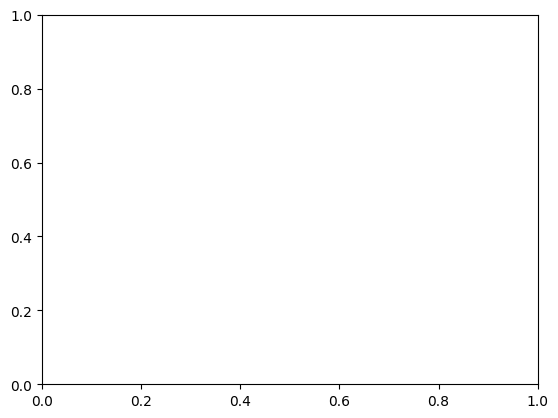

In [12]:
elasticity_summary = data.groupby('C_ARTICULO')['elasticidad'].mean()
print(elasticity_summary)

### VISUALIZACIÓN

import matplotlib.pyplot as plt

# Histograma de elasticidades
data['elasticidad'].dropna().hist(bins=20)
plt.title('Distribución de Elasticidades de Precio')
plt.xlabel('Elasticidad')
plt.ylabel('Frecuencia')
plt.show()

## Elasticidad por artículo


